데이콘에서 열린 병원 개/폐업 분류 예측 경진대회입니다.  
https://dacon.io/competitions/official/9565/overview/description

기존의 금융기관은 일반적으로 병원 대출 시 신용점수 또는 담보물 위주의 평가를 진행합니다.  
  
반면, 한국의 핀테크 기업인 모우다(MOUDA)는 상환 기간 동안의 계속 경영 여부를 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 병원들에게 금융 기회를 제공하려 합니다.  
  
이번 대회에서 폐업을 하는 병원을 예측하는 모델을 만들어주세요. 모우다에서는 폐업 예측을 기반으로 대출 여부를 결정합니다. 모델이 정확할 수록 원금 손실이 줄어듭니다.  
  
한국의 약 430개 병원의 재무제표 자료, 직원 수, 지역 정보가 제공됩니다. Inst_iid를 기준으로 샘플링 하였으며 어떤 병원이 폐업하는 지를 예측해야 합니다. 폐업은 0, 잔존은 1로 예측하면 됩니다.  
  

제출한 예측 결과물은 정확도(accuracy)로 평가합니다

In [1]:
# train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 

# test.csv - 폐업 여부를 제외하고 train.csv와 동일 

# sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



# inst_id - 각 파일에서의 병원 고유 번호

# OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

# sido – 병원의 광역 지역 정보

# sgg – 병원의 시군구 자료

# openDate – 병원 설립일

# bedCount - 병원이 갖추고 있는 병상의 수

# instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

# ·        종합병원 : 입원환자 100명 이상 수용 가능

# ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능

# ·        의원 : 입원 환자 30명 이하 수용 가능

# ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

 

# revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

# salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

# sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

# salary1 – 급여, 2017(회계년도)년 데이터를 의미함

# noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

# noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

# Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

# ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

# Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

# liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

# quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

# receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

# inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

# nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

# tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

# OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

# receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

# debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

# liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

# shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

# NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

# longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

# netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

# surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

 

# revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함

# salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함

# sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함

# salary2 – 급여, 2016(회계년도)년 데이터를 의미함

# noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함

# noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함

# interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함

# ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함

# profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함

# liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함

# quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함

# receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함

# inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함

# nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함

# tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함

# OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함

# receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함

# Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함

# liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함

# shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함

# NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함

# longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함

# netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함

# surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함

# employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

# employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

# ownerChange – 대표자의 변동 

# Pre-Processing for Data Cleaning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

train_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Project/병원개 폐업/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Project/병원개 폐업/test.csv'

train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [4]:
print(train_set.shape)
print(test_set.shape)

(301, 58)
(127, 58)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


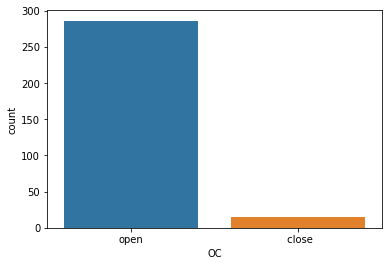

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Tartget값 분포 확인
sns.countplot('OC', data = train_set)

Target 값의 분포가 불균형합니다. 상식적으로 개원하는 병원에 비해서 폐업하는 병원의 비율이 낮은 것은 당연합니다.  
  
이와 같이 데이터의 비율이 불균형한 경우 모델 학습이 제대로 이루어지지 않을 수 있습니다. 이런 문제를 해결하는 방법은 오버샘플링, 언더샘플링이 있습니다. 오버샘플링은 비율이 적은 샘플의 개수를 늘리는 것이며 언더샘플링은 비율이 높은 샘플의 개수를 줄이는 것입니다. 현재 가진 데이터가 많지 않기 때문에 추후 오버샘플링을 적용해야할 것 같습니다.

# 결측치 확인 및 제거

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

51개의 소수 컬럼, 3개의 정수 컬럼, 5개의 오브젝트 컬럼이 있습니다.

In [7]:
train_set.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


8개의 결측치가 많이 있습니다. 결측치가 있는 데이터가 무엇인지 확인해 보겠습니다.

In [8]:
train_set.loc[(train_set['revenue1'].isnull()) & train_set['salescost1'].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
14,26,open,ulsan,127,20160531,237.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,901.0,same
32,55,open,incheon,141,19930708,232.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,323.0,same
55,87,open,gyeonggi,120,20130314,327.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,203.0,same
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,353,open,gyeonggi,81,20040303,255.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,244.0,same
257,362,open,choongnam,94,19861212,50.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,89.0,same
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


특정 행의 결측치 비율이 높은 것 같습니다. 이러한 행을 제거한 이후 결측치의 비율을 다시 확인해 보겠습니다.

In [9]:
# 결측치가 많은 행 제거
for row in train_set[train_set['revenue1'].isnull() == True].index:
  train_set = train_set.drop(row)

In [10]:
train_set.shape

(293, 58)

In [11]:
train_set.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               0
salescost1             0
sga1                   0
salary1                0
noi1                   0
noe1                   0
interest1              0
ctax1                  0
profit1                0
liquidAsset1           0
quickAsset1            0
receivableS1           0
inventoryAsset1        0
nonCAsset1             0
tanAsset1              0
OnonCAsset1            0
receivableL1           0
debt1                  0
liquidLiabilities1     0
shortLoan1             0
NCLiabilities1         0
longLoan1              0
netAsset1              0
surplus1               0
revenue2               0
salescost2             0
sga2                   0
salary2                0
noi2                   0
noe2                   0
interest2              0
ctax2                  0
profit2                0


결측치 비율이 높은 행이 삭제되었습니다. 이제 결측치가 있는 행은 `bedCount`, `instkind`, `employee2`, `employee2`입니다.  
  
`bedCount`,: 병원이 갖추고 있는 병상의 수  
`instkind`: 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류  
`employee1`: 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함  
`employee2`: 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

## Object 타입
먼저 범주형 변수에 대해서 살펴보겠습니다.

In [12]:
train_set.select_dtypes('object').nunique()

OC              2
sido           16
instkind        7
ownerChange     2
dtype: int64

타입이 float인 변수 중에서는 범주형 타입이 없는듯 합니다.

In [13]:
train_set.select_dtypes('object').head()

,OC,sido,instkind,ownerChange
0,open,choongnam,nursing_hospital,same
2,open,gyeonggi,nursing_hospital,same
3,open,incheon,general_hospital,same
4,open,gyeongnam,general_hospital,same
5,open,gyeongnam,general_hospital,same


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

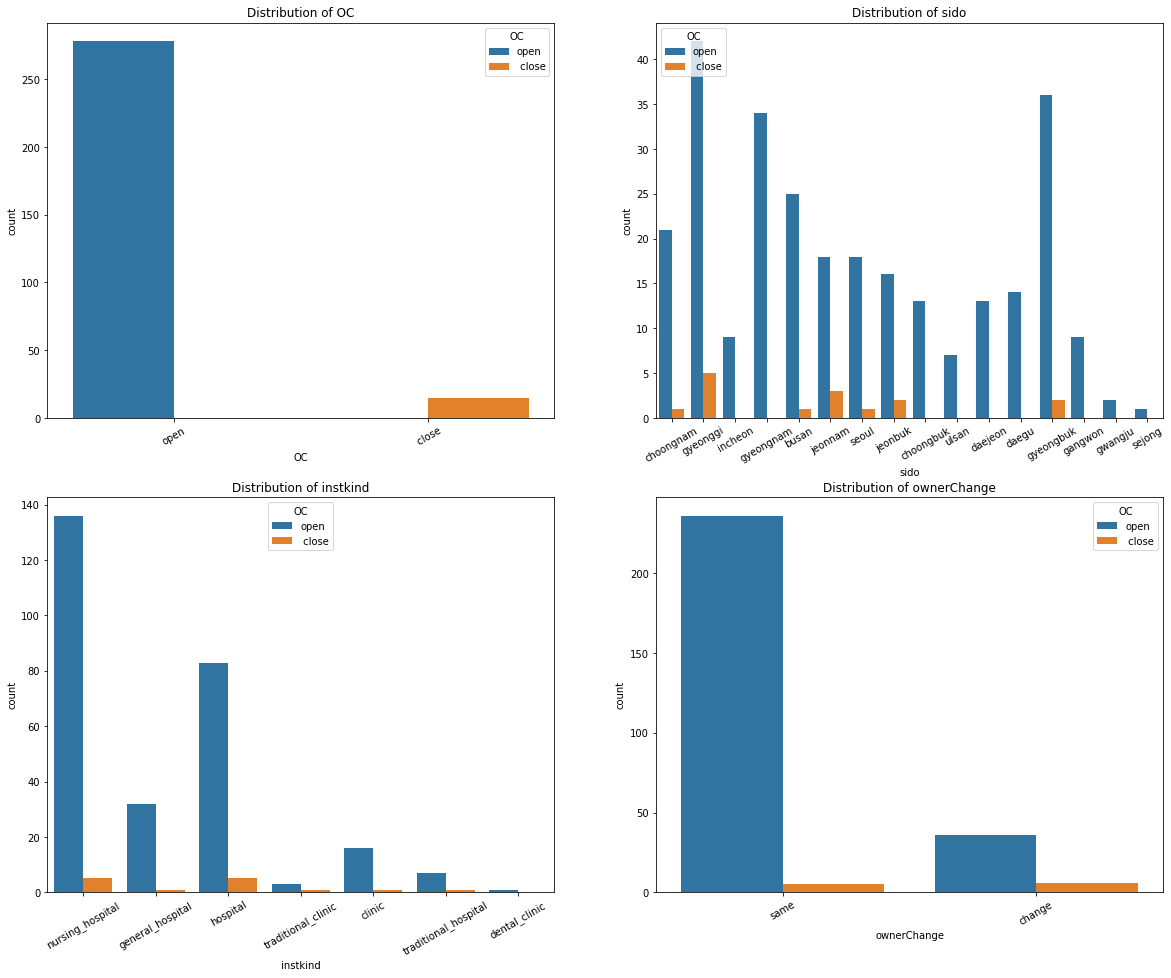

In [14]:
plt.figure(figsize = (20, 16))

for i, col in enumerate(train_set.select_dtypes('object')):
  ax = plt.subplot(2, 2, i + 1)
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
  sns.countplot(col, hue = 'OC', data = train_set)
  plt.title(f'Distribution of {col}'); plt.xlabel(f'{col}');

그래프의 오른쪽 위는 병원의 지역별 개/폐업 분포입니다. 서울, 경기, 전남, 전북, 충남, 경북의 폐업 비율이 높습니다.  
  
왼쪽 아래는 병원의 종류입니다.  
* `general_hospital`: 종합병원, 입원 환자 100명 이상 수용 가능  
* `hospital`: 병원, 입원 환자 30명 이상 100명 미만 수용 가능  
* `Clinic`: 의원, 입원 환자 30명 이하 수용 가능  
* `traditional_`: 한방, 침술과 한약으로 치료하는 의료 기관.  
* `nursing_hospital`: 요양원  
  
요양원과 병원의 폐업 비율이 높습니다.  
  
오른쪽 아래는 대표자의 변동 여부입니다. 두 카테고리의 폐업 수는 비슷하지만 대표자가 바뀐 경우의 폐업 비율은 더 높습니다.

## float 타입

비즈니스에서 이익을 얼마나 남기는지, 그리고 부채가 얼마나 되는지는 매우 중요한 요소입니다. 이에 따른 개, 폐업 여부의 분포를 살펴보겠습니다.

In [15]:
train_set.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,293.000000,293.000000,2.930000e+02,288.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,285.00000,282.000000
mean,220.453925,80.460751,2.005059e+07,143.663194,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,136.34386,128.060284
std,120.013678,51.254028,8.854337e+04,118.062972,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,148.85306,139.079178
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.00000,0.000000
25%,116.000000,37.000000,2.001122e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.00000,53.000000
50%,231.000000,73.000000,2.007120e+07,134.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,79.00000,77.500000
75%,320.000000,121.000000,2.011102e+07,186.750000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,170.00000,160.250000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.00000,1200.000000
